
# Import necessary libraries

In [90]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, 
                             auc, roc_auc_score, accuracy_score, precision_score, 
                             recall_score, f1_score)
from sklearn.feature_selection import SelectKBest, f_classif



In [91]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [92]:
## Read data with pandas Dataframe
df = pd.read_csv('cleaned_data_project3.csv')

In [93]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
y          0
x9         0
x10        0
x11        0
x12        0
x13        0
x15        0
x16        0
x17        0
x18        0
x19        0
x20        0
x21        0
x22        0
x23        0
x24        0
x28        0
x6         0
x25_L_C    0
x26_PT     0
x3_Male    0
x14_1      0
x14_2      0
x14_3      0
x14_4      0
x14_5      0
dtype: int64


In [94]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                  y            x9           x10           x11           x12  \
count  77073.000000  77073.000000  77073.000000  77073.000000  77073.000000   
mean       0.459694      2.752352      3.061747      2.764016      2.973272   
std        0.498376      1.347029      1.532547      1.408799      1.280224   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.000000      2.000000      2.000000      2.000000   
50%        0.000000      3.000000      3.000000      3.000000      3.000000   
75%        1.000000      4.000000      4.000000      4.000000      4.000000   
max        1.000000      5.000000      5.000000      5.000000      5.000000   

                x13           x15           x16           x17           x18  \
count  77073.000000  77073.000000  77073.000000  77073.000000  77073.000000   
mean       3.226227      3.464105      3.388606      3.414321      3.363084   
std        1.326399      1.31586

# Check class distribution (IMBALANCED DATA CHECK)

In [95]:
target_counts = df['y'].value_counts()
print(f"\nClass distribution:\n{target_counts}")
print(f"\nClass proportions:\n{df['y'].value_counts(normalize=True)}")


Class distribution:
0    41643
1    35430
Name: y, dtype: int64

Class proportions:
0    0.540306
1    0.459694
Name: y, dtype: float64


[Text(0, 0, '0'), Text(1, 0, '1')]

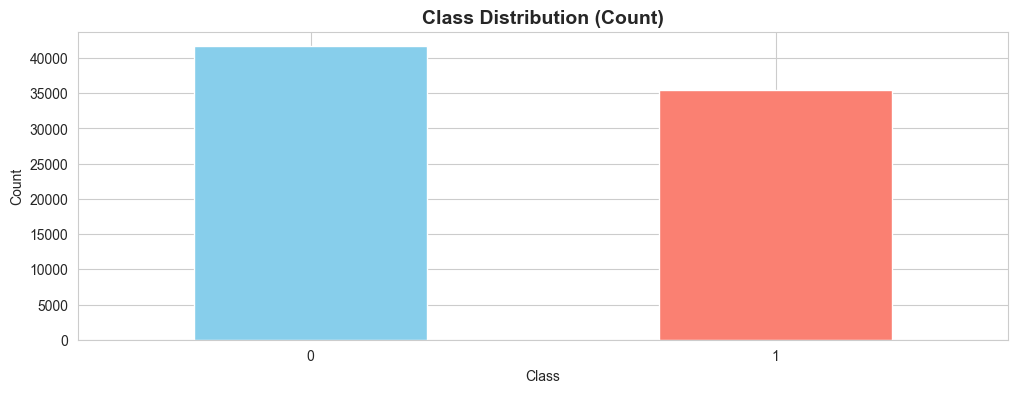

In [96]:
# Visualize class distribution
fig, ax = plt.subplots(figsize=(12, 4))

# Count plot
target_counts.plot(kind='bar', ax=ax,color=['skyblue', 'salmon'])

# Titles and labels
ax.set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


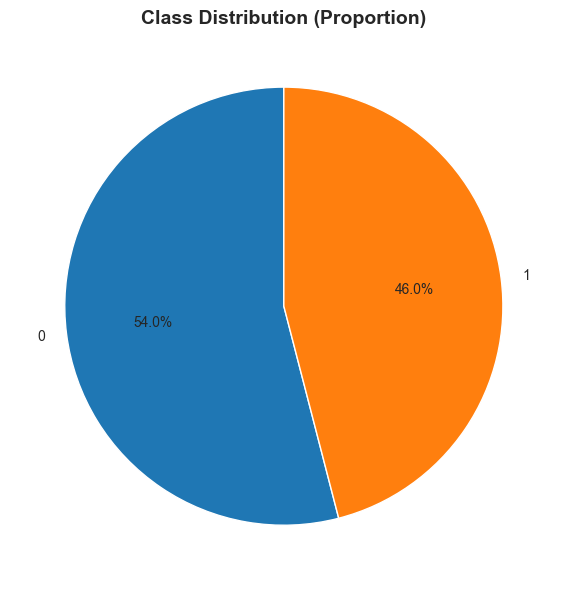

In [97]:
# Pie chart
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

ax.set_title('Class Distribution (Proportion)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [99]:
# Calculate imbalance ratio
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("Dataset is IMBALANCED!")
    print("   Consider using techniques like SMOTE, class_weight, or resampling")
else:
    print("Dataset is relatively balanced")


Imbalance Ratio: 1.18
Dataset is relatively balanced


# Split data into features and target

In [ ]:

X = df.drop('y', axis=1)
y = df['y']

In [12]:
# Split 1: Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Split 2: Validation (20%) and Test (20%) from Temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [13]:
print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set size: {X_val.shape[0]} ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in each set
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in validation set:")
print(pd.Series(y_val).value_counts())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts())

Training set size: 46243 (60.0%)
Validation set size: 15415 (20.0%)
Test set size: 15415 (20.0%)

Class distribution in training set:
0    24985
1    21258
Name: y, dtype: int64

Class distribution in validation set:
0    8329
1    7086
Name: y, dtype: int64

Class distribution in test set:
0    8329
1    7086
Name: y, dtype: int64



# ## Feature Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"Mean of scaled training features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std():.6f}")

Mean of scaled training features: 0.000000
Std of scaled training features: 1.000000


# ##  Feature Selection


In [15]:
# Method 1: SelectKBest with f_classif
selector_f = SelectKBest(score_func=f_classif, k=15)
X_train_kbest = selector_f.fit_transform(X_train_scaled, y_train)

In [16]:
# Get feature scores
feature_scores_f = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector_f.scores_,
    'Selected': selector_f.get_support()
}).sort_values('F_Score', ascending=False)

In [81]:
## Top features printed
print("\nTop 10 Features by F-Score:")
print(feature_scores_f.head(14))


Top 10 Features by F-Score:
   Feature       F_Score  Selected
15     x28  14901.558661      True
18  x26_PT  12155.710566      True
24   x14_5  10750.987390      True
6      x16   8357.019933      True
5      x15   5971.767881      True
7      x17   5284.546450      True
22   x14_3   5174.720047      True
8      x18   4935.809008      True
21   x14_2   4331.858852      True
12     x22   4238.172430      True
0       x9   3882.152706      True
23   x14_4   2935.342409      True
9      x19   2838.427755      True
11     x21   2731.159922      True


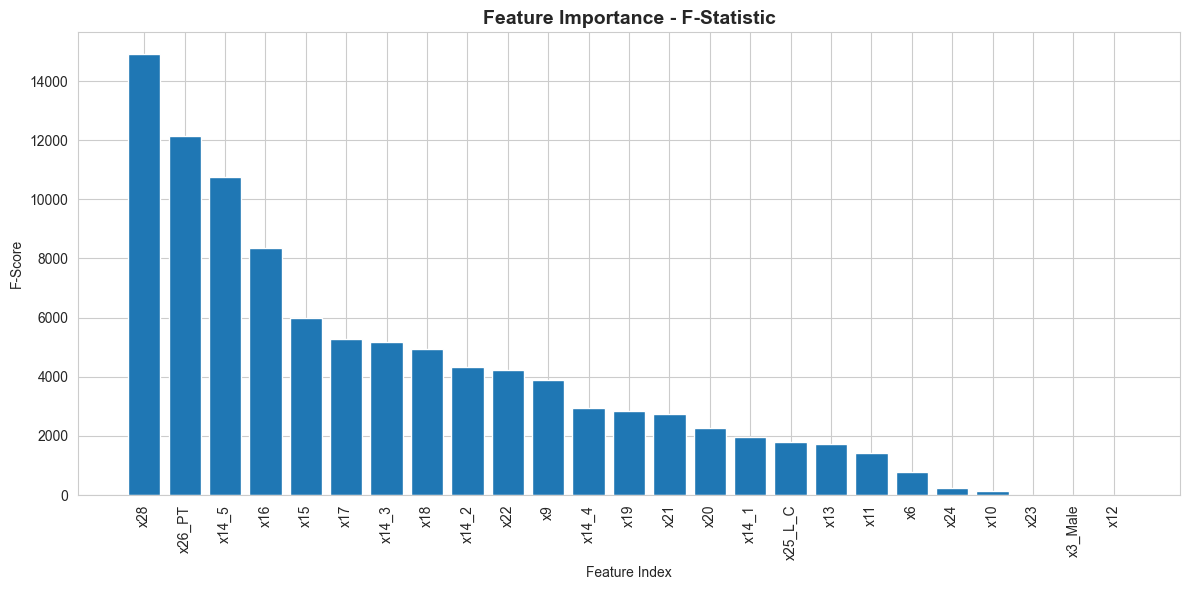

In [18]:
# Visualize feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_scores_f)), feature_scores_f['F_Score'])
plt.xlabel('Feature Index')
plt.ylabel('F-Score')
plt.title('Feature Importance - F-Statistic', fontsize=14, fontweight='bold')
plt.xticks(range(len(feature_scores_f)), feature_scores_f['Feature'], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Basic Logistic Regression
lr_rfe = LogisticRegression(random_state=42)
lr_rfe.fit(X_train_scaled, y_train)
y_pred = lr_rfe.predict(X_test)

X has feature names, but LogisticRegression was fitted without feature names


In [ ]:

# 5. Basic logistic regression Accuracy on test dataset
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7323386312033734


# ##  Model Training with Hyperparameter Tuning

In [ ]:

## Performed different hyper parameter tuning techniques 
print("="*50)
print("HYPERPARAMETER TUNING WITH GRID SEARCH")
print("="*50)

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

# Grid search with cross-validation
lr = LogisticRegression(max_iter=2000, random_state=42)
grid_search = GridSearchCV(
    lr, param_grid, cv=5, scoring='roc_auc', 
    n_jobs=-1, verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation ROC-AUC: {grid_search.best_score_:.4f}")

HYPERPARAMETER TUNING WITH GRID SEARCH
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters: {'C': 100, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best cross-validation ROC-AUC: 0.9529


In [22]:
# Get best model
best_model = grid_search.best_estimator_

# ##  K-Fold Cross-Validation

In [66]:

print("\n" + "="*50)
print("K-FOLD CROSS-VALIDATION (k=10)")
print("="*50)


K-FOLD CROSS-VALIDATION (k=10)


In [ ]:
# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Evaluate multiple metrics
cv_scores_accuracy = cross_val_score(best_model, X_train_scaled, y_train, 
                                     cv=cv, scoring='accuracy')
cv_scores_roc_auc = cross_val_score(best_model, X_train_scaled, y_train, 
                                    cv=cv, scoring='roc_auc')
cv_scores_f1 = cross_val_score(best_model, X_train_scaled, y_train, 
                               cv=cv, scoring='f1')

print(f"\nAccuracy: {cv_scores_accuracy.mean():.4f} (+/- {cv_scores_accuracy.std():.4f})")
print(f"ROC-AUC: {cv_scores_roc_auc.mean():.4f} (+/- {cv_scores_roc_auc.std():.4f})")
print(f"F1-Score: {cv_scores_f1.mean():.4f} (+/- {cv_scores_f1.std():.4f})")


Accuracy: 0.8896 (+/- 0.0045)
ROC-AUC: 0.9529 (+/- 0.0032)
F1-Score: 0.8805 (+/- 0.0048)


# ##  Model Evaluation - Train Set

In [80]:
print("="*50)
print("TRAINING SET PERFORMANCE")
print("="*50)

TRAINING SET PERFORMANCE


In [82]:
# Predictions on training set
y_train_pred = best_model.predict(X_train_scaled)
y_train_proba = best_model.predict_proba(X_train_scaled)[:, 1]

In [83]:
# Metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_proba)

In [84]:
print(f"\nAccuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")
print(f"ROC-AUC:   {train_roc_auc:.4f}")


Accuracy:  0.8899
Precision: 0.8768
Recall:    0.8849
F1-Score:  0.8808
ROC-AUC:   0.9531


In [85]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     24985
           1       0.88      0.88      0.88     21258

    accuracy                           0.89     46243
   macro avg       0.89      0.89      0.89     46243
weighted avg       0.89      0.89      0.89     46243



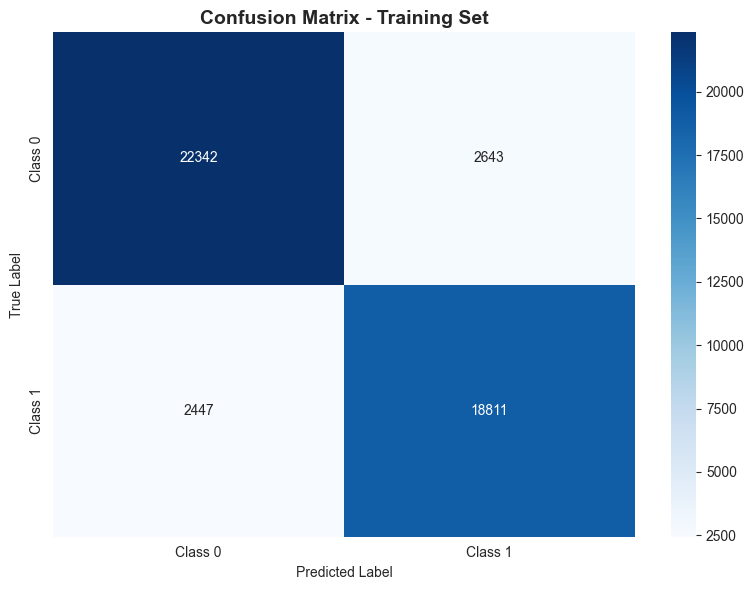

In [86]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Training Set', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

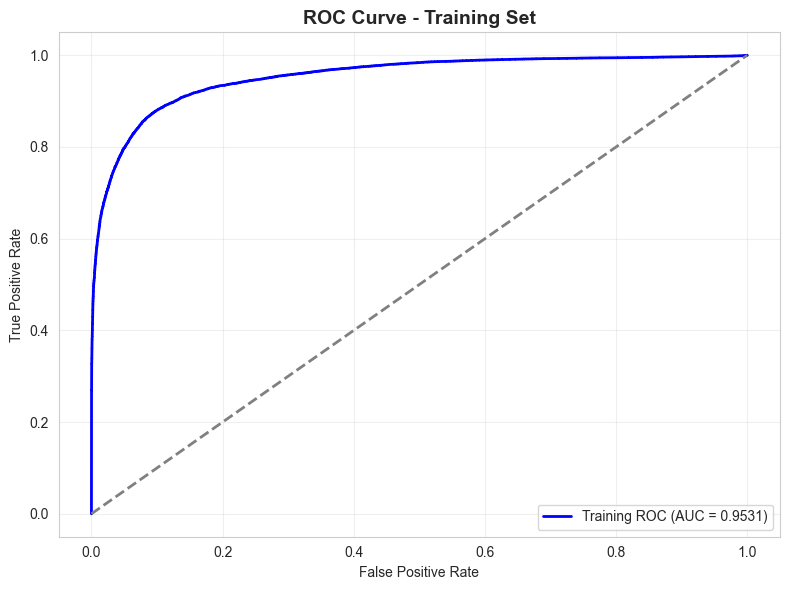

In [87]:
# ROC Curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, 
         label=f'Training ROC (AUC = {train_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Training Set', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ##  Model Evaluation - Train Set

In [67]:
#a Predictions on test set
y_test_pred = best_model.predict(X_test_scaled)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

In [68]:
# Metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

In [69]:
print(f"\nAccuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print(f"ROC-AUC:   {test_roc_auc:.4f}")


Accuracy:  0.8919
Precision: 0.8804
Recall:    0.8850
F1-Score:  0.8827
ROC-AUC:   0.9537


In [70]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8329
           1       0.88      0.88      0.88      7086

    accuracy                           0.89     15415
   macro avg       0.89      0.89      0.89     15415
weighted avg       0.89      0.89      0.89     15415



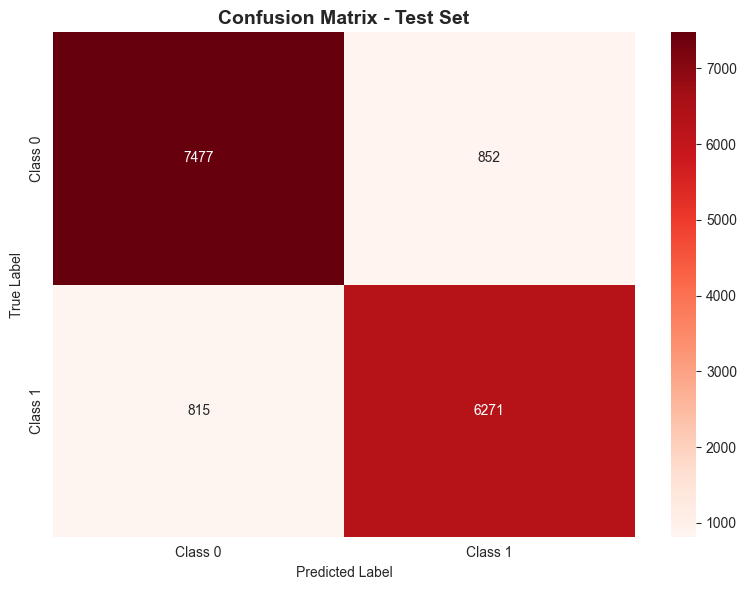

In [71]:
# Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Reds', cbar=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Test Set', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

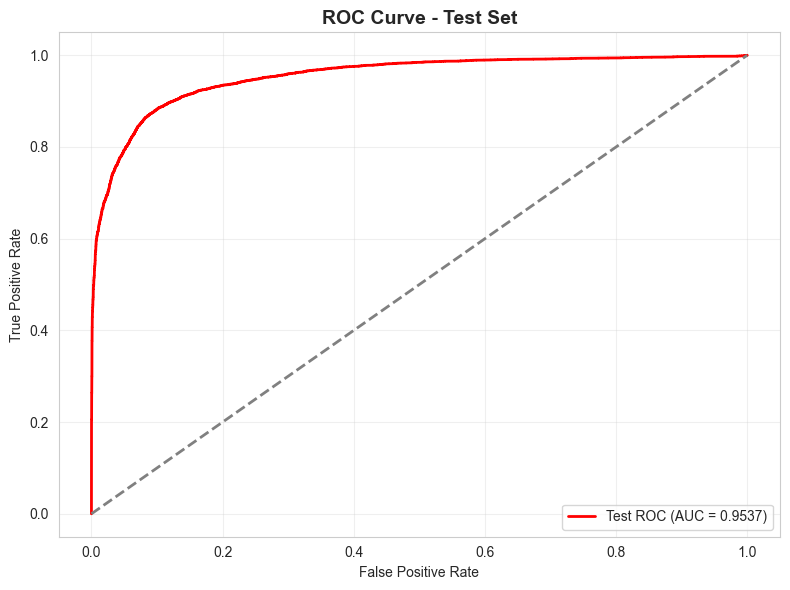

In [72]:
# ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', lw=2, 
         label=f'Test ROC (AUC = {test_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test Set', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [73]:
# %% [markdown]
# ## 12. Model Evaluation - Validation Set

# %%
print("="*50)
print("VALIDATION SET PERFORMANCE")
print("="*50)

VALIDATION SET PERFORMANCE


In [74]:
# Predictions on validation set
y_val_pred = best_model.predict(X_val_scaled)
y_val_proba = best_model.predict_proba(X_val_scaled)[:, 1]

In [75]:
# Metrics
val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_proba)

print(f"\nAccuracy:  {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall:    {val_recall:.4f}")
print(f"F1-Score:  {val_f1:.4f}")
print(f"ROC-AUC:   {val_roc_auc:.4f}")


Accuracy:  0.8910
Precision: 0.8790
Recall:    0.8847
F1-Score:  0.8818
ROC-AUC:   0.9552


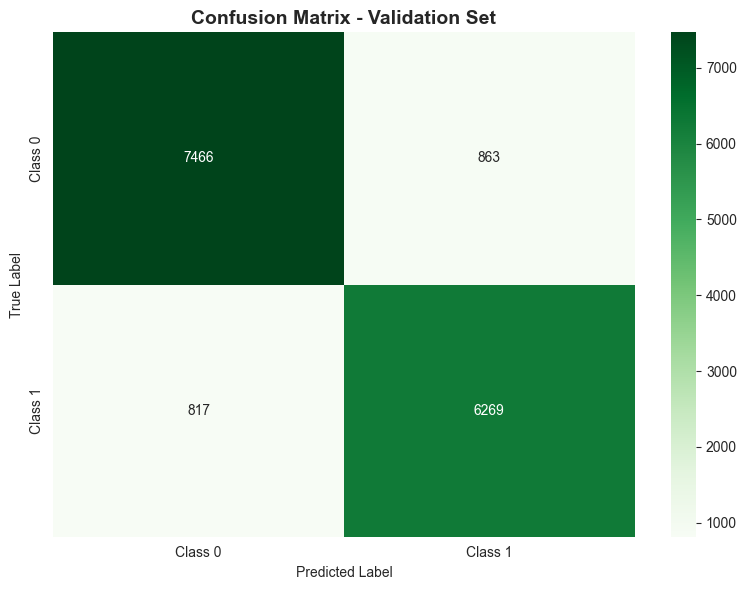

In [76]:
# Confusion Matrix
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Validation Set', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

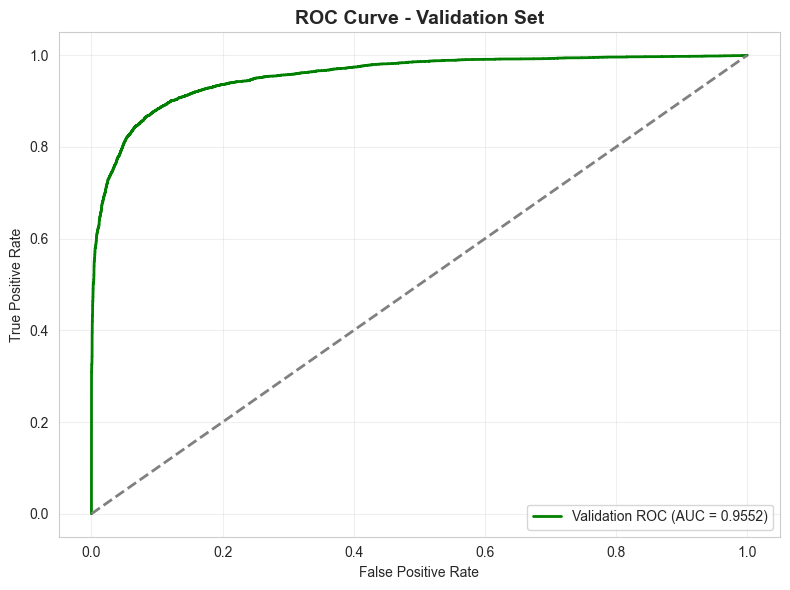

In [77]:
# ROC Curve
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='green', lw=2, 
         label=f'Validation ROC (AUC = {val_roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ## 14. Combined ROC Curves - All Sets

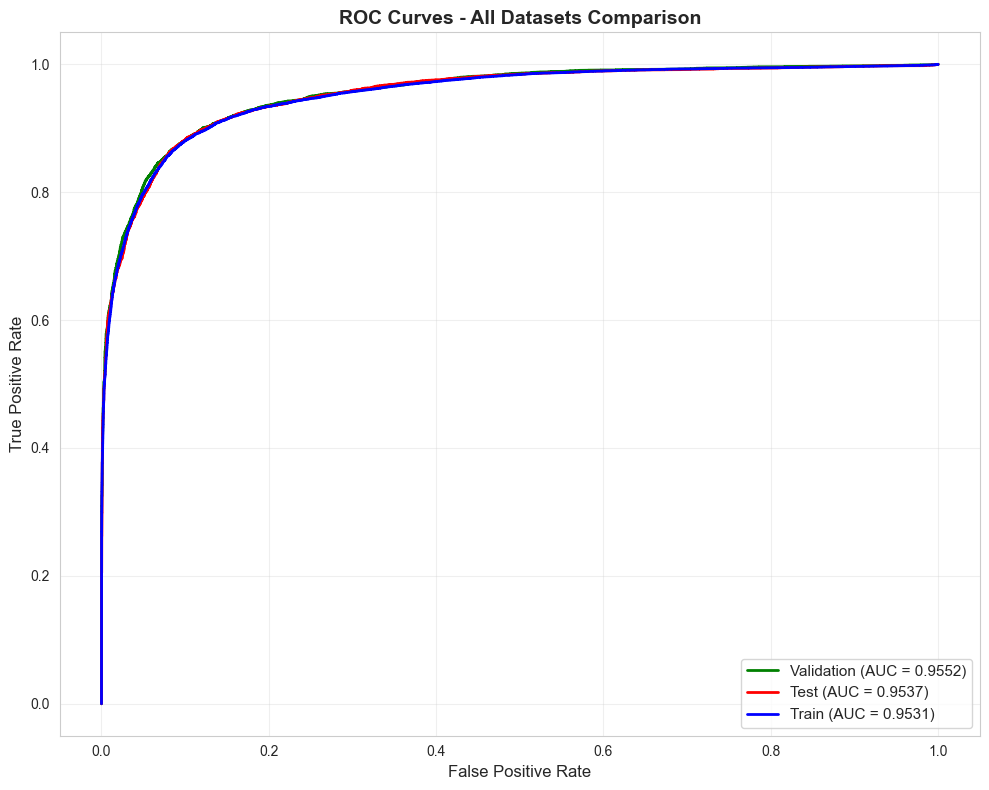

In [ ]:


# Plot all ROC curves together
plt.figure(figsize=(10, 8))

plt.plot(fpr_val, tpr_val, color='green', lw=2, 
         label=f'Validation (AUC = {val_roc_auc:.4f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, 
         label=f'Test (AUC = {test_roc_auc:.4f})')
plt.plot(fpr_train, tpr_train, color='blue', lw=2, 
         label=f'Train (AUC = {train_roc_auc:.4f})')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Datasets Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:

# Created results dataframe
results_df = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Training_AUC': [train_roc_auc],
    'Validation_AUC': [val_roc_auc],
    'Test_AUC': [test_roc_auc]
})

# Save to Excel
results_df.to_excel('logistic_regression_results.xlsx', index=False)

print("Results saved to 'logistic_regression_results.xlsx'")
print(results_df)

Results saved to 'logistic_regression_results.xlsx'
                 Model  Training_AUC  Validation_AUC  Test_AUC
0  Logistic Regression      0.953103        0.955242  0.953653
